# Telco Customer Churn Analysis using Logistic Regression

We will analyse the data and answer the following questions:
1. Which categories had the most affect on the customer churn rate?
2. Can we generate a predictive model to determine which customer has the potential to churn?


## Data Dictionary
1. **customerID**: Customer ID
2. **gender**: Whether the customer is a male or a female
3. **SeniorCitizen**: Whether the customer is a senior citizen or not (1, 0)
4. **Partner**: Whether the customer has a partner or not (Yes, No)
5. **Dependents**: Whether the customer has dependents or not (Yes, No)
6. **tenure**: Number of months the customer has stayed with the company
7. **PhoneService**: Whether the customer has a phone service or not (Yes, No)
8. **MultipleLines**: Whether the customer has multiple lines or not (Yes, No, No phone service)
9. **InternetService**: Customer’s internet service provider (DSL, Fiber optic, No)
10. **OnlineSecurity**: Whether the customer has online security or not (Yes, No, No internet service)
11. **OnlineBackup**: Whether the customer has online backup or not (Yes, No, No internet service)
12. **DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service)
13. **TechSupport**: Whether the customer has tech support or not (Yes, No, No internet service)
14. **StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)
15. **StreamingMovies**: Whether the customer has streaming movies or not (Yes, No, No internet service)
16. **Contract**: The contract term of the customer (Month-to-month, One year, Two year)
17. **PaperlessBilling**: Whether the customer has paperless billing or not (Yes, No)
18. **PaymentMethod**: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. **MonthlyCharges**: The amount charged to the customer monthly
20. **TotalCharges**: The total amount charged to the customer
21. **Churn**: Whether the customer churned or not (Yes or No)

In [1]:
#importing all the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

We will start by loading the dataset.

# Feature Engineering

In [2]:
os.chdir("/Users/sarabjotsingh/Documents/Github/Projects/Logistic")

data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn 2.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

TotalCharges should be float rather than object. Let us change its datatype.
But before that, let us explore the column more.

In [4]:
data["TotalCharges"].isnull().sum()

0

At this point, we cannoy observe any missing value. Let us explore the frequencies of various charges in the column.

In [5]:
data["TotalCharges"].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

The first category is blank. It is not coming up as a missing value because its actually a string " ". 
Let us replace that with a numpy missing value i.e. np.nan .

In [6]:
data["TotalCharges"]=data["TotalCharges"].replace(r'^\s*$',np.nan,regex=True)

In [7]:
data["TotalCharges"].isnull().mean()

0.001561834445548772

In [8]:
data.dropna(inplace=True)

Thus the percentage of missing values in TotalCharges which were masked by emply space character is 0.15%
Let us now change the data type of the TotalCharges column.

In [9]:
data["TotalCharges"]=data["TotalCharges"].astype(float)

Also, SeniorCitizen has int as its type. Let us change it to object

In [10]:
data["SeniorCitizen"]=data["SeniorCitizen"].astype(object)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


The data does not have any missing values.

Let us look for outliers

<AxesSubplot:>

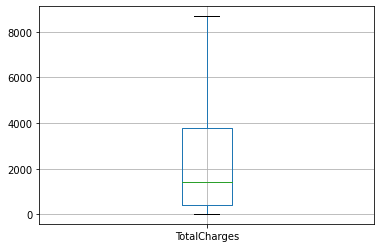

In [12]:
data.boxplot("TotalCharges")

<AxesSubplot:>

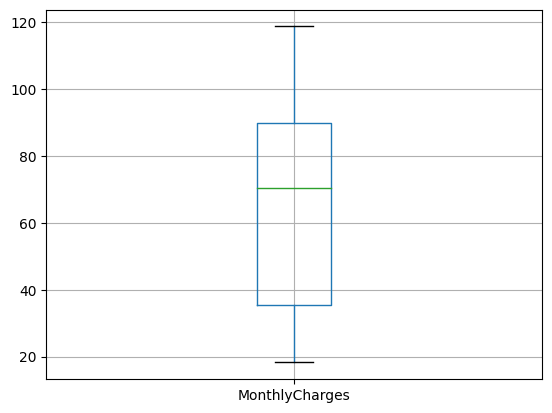

In [13]:
data.boxplot("MonthlyCharges")

No outliers

Let us have a look at the distribution of numerical variables

array([[<AxesSubplot:title={'center':'MonthlyCharges'}>]], dtype=object)

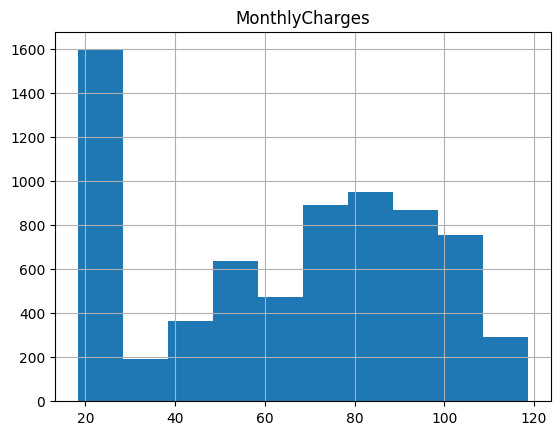

In [14]:
data.hist("MonthlyCharges",bins=10)

array([[<AxesSubplot:title={'center':'TotalCharges'}>]], dtype=object)

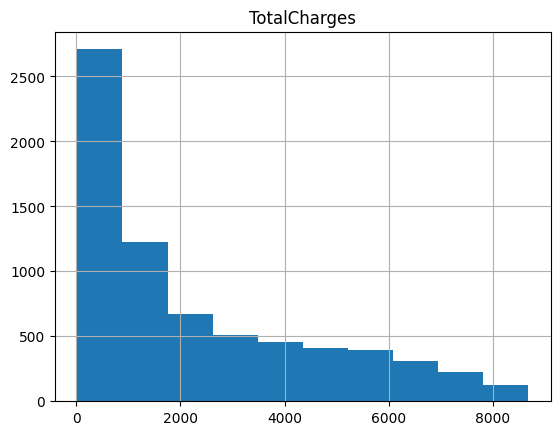

In [15]:
data.hist("TotalCharges",bins=10)

array([[<AxesSubplot:title={'center':'tenure'}>]], dtype=object)

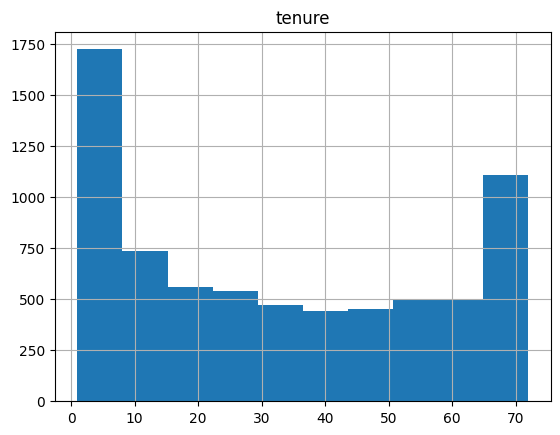

In [16]:
data.hist("tenure",bins=10)

The distributions of the numerical variables are highly skewed.

## Feature Selection

There are many categorical variables in our data. Let us visualize the effect of these categories on the churn rate.

In [17]:
sns.set(style='darkgrid')
from scipy.stats import chi2_contingency

#creating a function to create a stacked barplot using cross tabulations.
def count_barplot(category):
    CrosstabResult=pd.crosstab(index=data[category],columns=data['Churn'],normalize="index")
    %matplotlib inline
    CrosstabResult.plot.bar(stacked=True)
    print(CrosstabResult)

Churn         No       Yes
gender                    
Female  0.730405  0.269595
Male    0.737954  0.262046


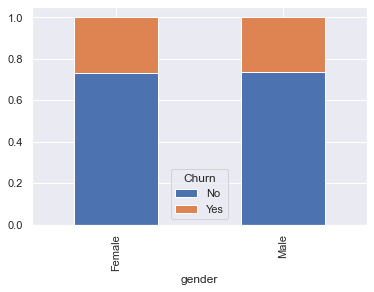

In [18]:
count_barplot("gender")

The churn rate doesn't really change from male to female. So gender does not seem like a significant variable for our analysis.

Churn                No       Yes
SeniorCitizen                    
0              0.763497  0.236503
1              0.583187  0.416813


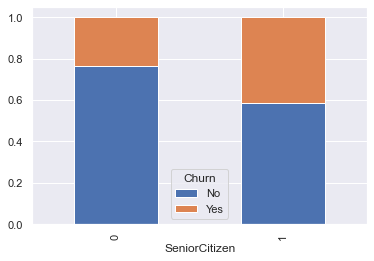

In [19]:
count_barplot("SeniorCitizen")

The churn rate is a bit high for senior citizens as compared to that of non senior citizens.

Churn          No       Yes
Partner                    
No       0.670239  0.329761
Yes      0.802829  0.197171


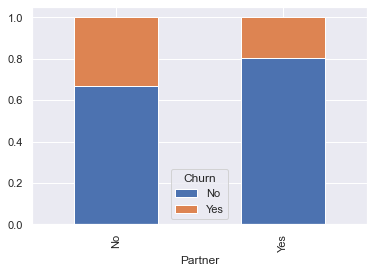

In [20]:
count_barplot("Partner")

The churn rate is a bit high for people not having a partner.

Churn             No       Yes
Dependents                    
No          0.687209  0.312791
Yes         0.844688  0.155312


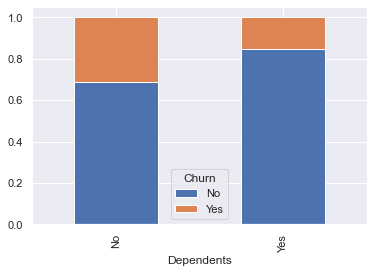

In [21]:
count_barplot("Dependents")

The churn rate is high for people with no dependents.

Churn               No       Yes
PhoneService                    
No            0.750000  0.250000
Yes           0.732525  0.267475


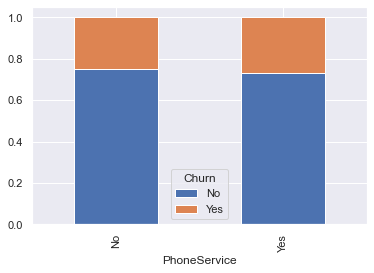

In [22]:
count_barplot("PhoneService")

Churn                   No       Yes
MultipleLines                       
No                0.749188  0.250812
No phone service  0.750000  0.250000
Yes               0.713515  0.286485


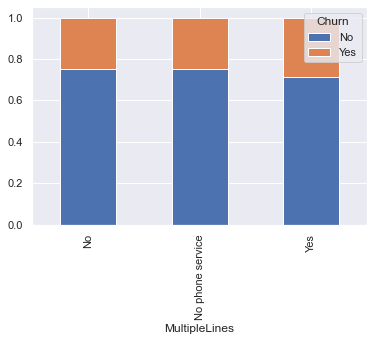

In [23]:
count_barplot("MultipleLines")

The churn rate seems more or less similar, for customers having or not having multiple lines and no phone service.

Churn                  No       Yes
InternetService                    
DSL              0.810017  0.189983
Fiber optic      0.581072  0.418928
No               0.925658  0.074342


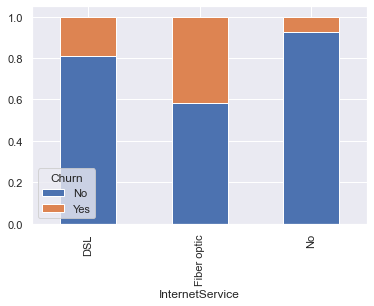

In [24]:
count_barplot("InternetService")

The churn rate is high for customers using Fiber Optic, as compared to those using DSL or not having an internet service.

Churn                      No       Yes
OnlineSecurity                         
No                   0.582213  0.417787
No internet service  0.925658  0.074342
Yes                  0.853598  0.146402


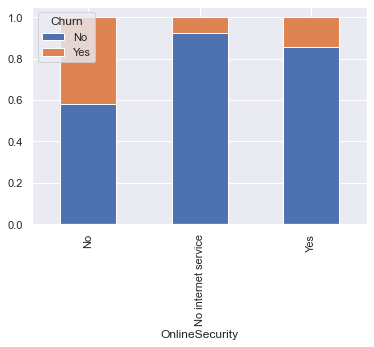

In [25]:
count_barplot("OnlineSecurity")

The churn rate is high for customers with no online security as compared to those opting for online security or even people with no internet service.

Churn                      No       Yes
OnlineBackup                           
No                   0.600583  0.399417
No internet service  0.925658  0.074342
Yes                  0.784330  0.215670


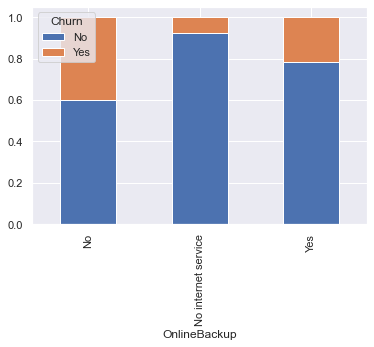

In [26]:
count_barplot("OnlineBackup")

The churn rate is high for customers with no online backup as compared to those opting for online backup or even people with no internet service.

Churn                      No       Yes
DeviceProtection                       
No                   0.608597  0.391403
No internet service  0.925658  0.074342
Yes                  0.774607  0.225393


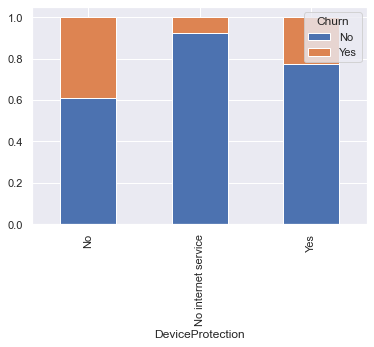

In [27]:
count_barplot("DeviceProtection")

The churn rate is high for customers with no device protection as compared to those opting for device protection or even people with no internet service.

Churn                      No       Yes
TechSupport                            
No                   0.583525  0.416475
No internet service  0.925658  0.074342
Yes                  0.848039  0.151961


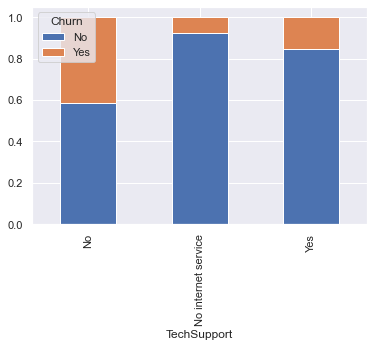

In [28]:
count_barplot("TechSupport")

The churn rate is high for customers with no technical support as compared to those opting for technical support or even people with no internet service.

Churn                      No       Yes
StreamingTV                            
No                   0.664649  0.335351
No internet service  0.925658  0.074342
Yes                  0.698853  0.301147


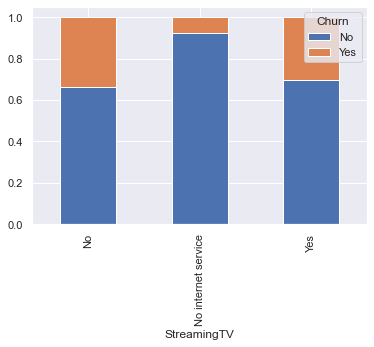

In [29]:
count_barplot("StreamingTV")

The churn rate is quite low for customers who did not buy an internet service with us. However, people with no streaming tv service or with, have similar churn rates. 

Churn                      No       Yes
StreamingMovies                        
No                   0.662711  0.337289
No internet service  0.925658  0.074342
Yes                  0.700476  0.299524


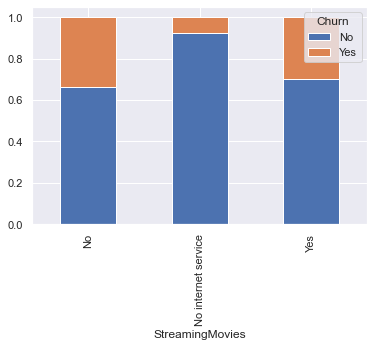

In [30]:
count_barplot("StreamingMovies")

The churn rate is quite low for customers who did not buy an internet service with us. However, people with or without streaming movies service, have similar churn rates.

Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887228  0.112772
Two year        0.971513  0.028487


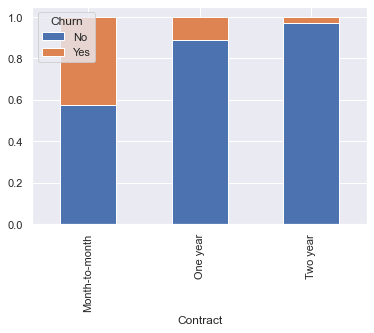

In [31]:
count_barplot("Contract")

The churn rates are high for customers with month-to-month contract and decreases as the contract term increases. This was kind of expected as people with higher contract lengths don't have high flexibility of leaving the subscription as compared to those with month-to-month conracts.

Churn                   No       Yes
PaperlessBilling                    
No                0.836243  0.163757
Yes               0.664107  0.335893


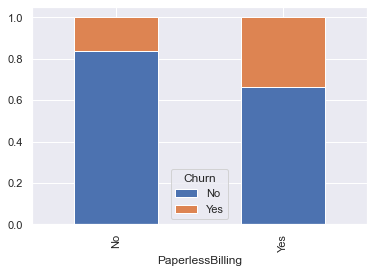

In [32]:
count_barplot("PaperlessBilling")


Churn rate for customers using paperless billing is higher than that of customers not using paperless billing.

Churn                            No       Yes
PaymentMethod                                
Bank transfer (automatic)  0.832685  0.167315
Credit card (automatic)    0.847469  0.152531
Electronic check           0.547146  0.452854
Mailed check               0.807980  0.192020


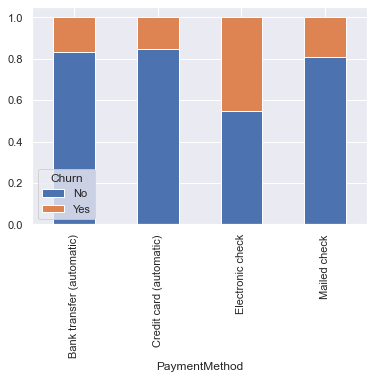

In [33]:
count_barplot("PaymentMethod")

Churn rate for customers using electronic check is higher than that of customers using other methods of payment.

Although, the visualizations do give us some insights on the relationship between churn rates and different categories, it is important that we use something more robust for our feature selection.
We will use the Chi-Square contingency test to determine, if the relationship between the category and churn rate is statistically significant or not.

Null Hypotheses: Ho: There is no significant relationship between the category and churn rate

Alternate Hypothesis: H1: There is a significant relationship between the category and churn rate

Threshold of p-value-0.05

In [34]:
# replacing no internet service and no phone service by no
data["StreamingMovies"]=np.where(data["StreamingMovies"]=="No internet service","No",data["StreamingMovies"])
data["StreamingTV"]=np.where(data["StreamingTV"]=="No internet service","No",data["StreamingTV"])
data["TechSupport"]=np.where(data["TechSupport"]=="No internet service","No",data["TechSupport"])
data["DeviceProtection"]=np.where(data["DeviceProtection"]=="No internet service","No",data["DeviceProtection"])
data["OnlineBackup"]=np.where(data["OnlineBackup"]=="No internet service","No",data["OnlineBackup"])
data["OnlineSecurity"]=np.where(data["OnlineSecurity"]=="No internet service","No",data["OnlineSecurity"])
data["MultipleLines"]=np.where(data["MultipleLines"]=="No phone service","No",data["MultipleLines"])

In [35]:
# creating a function to check whethere the given category 
# has a significant relationship with our target variable: Churn

rel_check=[]
p_value=[]
def rel_chi(category):
    CrosstabResult=pd.crosstab(data['Churn'],data[category])
    chi_res = chi2_contingency(pd.crosstab(data['Churn'], data[category]))
    p_value.append(chi_res[1])
    if chi_res[1]<0.05:
        rel_check.append("Significant relationship")
    else:
        rel_check.append("No Significant relationship")
    

categories=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 
            'StreamingMovies', 'Contract','PaperlessBilling','PaymentMethod']

#determining significance of relationships using rel_check

for cat in categories:
            rel_chi(cat)
check=pd.DataFrame(data=[categories,rel_check,p_value]).T
check.columns=["Categorical Variable","Relationship","p_value"]
check

,Categorical Variable,Relationship,p_value
0,gender,No Significant relationship,0.490488
1,SeniorCitizen,Significant relationship,0.0
2,Partner,Significant relationship,0.0
3,Dependents,Significant relationship,0.0
4,PhoneService,No Significant relationship,0.349924
5,MultipleLines,Significant relationship,0.000869
6,InternetService,Significant relationship,0.0
7,OnlineSecurity,Significant relationship,0.0
8,OnlineBackup,Significant relationship,0.0
9,DeviceProtection,Significant relationship,0.0


Because the relationships between Gender and Churn and Phone Service and Churn are not statistically significant, including GENDER and PHONE SERVICE in our model, would not be beneficial. So let us delete these columns.

In [36]:
data=data.drop(["gender","PhoneService"],axis=1)
categories.remove("gender")
categories.remove("PhoneService")
data.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,Yes,No,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,0,No,No,45,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


CustomerID should also be removed as it is just an unique identifier of a customer. It doesn't give any information on customer behaviour.

In [37]:
data.drop(["customerID"],axis=1,inplace=True)

The Chi-Square tests helped us determine which categorical variables to remove. With the help of concept of collinearity, we will see which variables are highly correlated and remove the variable which is highly correlated with the most. This will ensure that multicollinearity is minimum in our model.

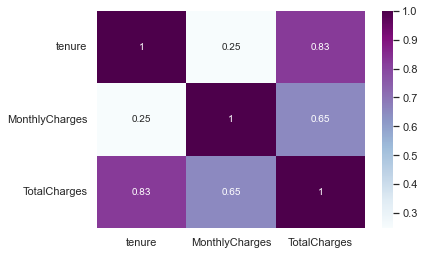

In [38]:
sns.set_style("white")
sns.heatmap(data.corr(),cmap="BuPu",annot=True)
data.drop(["TotalCharges"],axis=1,inplace=True)

TotalCharges has a really high correlation with Tenure as well as Monthly Charges. So, we will delete this column.

Now its time for, splitting the data into test and train data.

## Splitting the data into train and test data.

In [39]:
from sklearn.model_selection import train_test_split
y=data["Churn"]
X=data.drop(["Churn"],axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

25% of the data is now the test data and the rest 75% is now the training data.

## Encoding of categorical variables

In [40]:


# label encoding (binary variables) in data
label_encoding_columns = ['Partner', 'Dependents', 'PaperlessBilling']

# ohe (binary variables) in data
one_hot_encoding_columns = ['MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract','PaymentMethod']

# encode categorical binary features using label encoding in training data
for column in label_encoding_columns:
    x_train[column] = x_train[column].map({'Yes': 1, 'No': 0}) 

y_train=y_train.map({'Yes': 1, 'No': 0})

# encode categorical variables with more than two levels using one-hot encoding n training data
x_train= pd.get_dummies(x_train, columns = one_hot_encoding_columns)

# encode categorical binary features using label encoding in test data
for column in label_encoding_columns:
    x_test[column] = x_test[column].map({'Yes': 1, 'No': 0}) 

y_test=y_test.map({'Yes': 1, 'No': 0})

# encode categorical variables with more than two levels using one-hot encoding in test data
x_test= pd.get_dummies(x_test, columns = one_hot_encoding_columns)

I am not removing the extra dummy variables (which help us avoid dummy trap) because sklearn can handle multiple dummy variables and avoid dummy trap.

## Normalization

Because our numerical features, tenure and monthly charges, have different units of measurement, we will normalize them using Min-Max scaling technique.
We will calculate min and max of the respective column using training data and transform training and test data using those values. This helps us protect our model from information leakage.

In [41]:
min_max_columns = ['tenure', 'MonthlyCharges']

# scale numerical variables using min max scaler
for column in min_max_columns:
        # minimum value of the column
        min_column = x_train[column].min()
        # maximum value of the column
        max_column = x_train[column].max()
        # min max scaler
        x_train[column] = (x_train[column] - min_column) / (max_column - min_column)
        
for column in min_max_columns:
        x_test[column] = (x_test[column] - min_column) / (max_column - min_column)

## Modeling

Creating a Logistic Regression Model that can help us predict if a customer will churn or not.

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

Predicted probabilities of Churn on our test data. According to the concept of Logistic Regression, if the probability is >0.5, the customer will churn else not.

In [44]:
model.predict_proba(x_test)[:,1]

array([0.32549275, 0.2250375 , 0.22242904, ..., 0.61365948, 0.13201921,
       0.0199735 ])

Predicted values of Churn on our test data.

In [52]:
predictions = model.predict(x_test)
print(predictions)

[0 0 0 ... 1 0 0]


Variables and their coefficients.

In [59]:
model_features = x_train.columns
coefficient_df = pd.DataFrame({"Variable" : model_features, "Coefficient": model.coef_[0]})
print(coefficient_df.sort_values(by="Coefficient",ascending=False, key=abs))

                                   Variable  Coefficient
3                                    tenure    -2.445148
5                            MonthlyCharges    -1.430608
10                       InternetService_No    -1.179425
9               InternetService_Fiber optic     1.109856
25                        Contract_Two year    -0.734331
23                  Contract_Month-to-month     0.646045
4                          PaperlessBilling     0.391355
0                             SeniorCitizen     0.289957
28           PaymentMethod_Electronic check     0.277548
21                       StreamingMovies_No    -0.268153
27    PaymentMethod_Credit card (automatic)    -0.257476
19                           StreamingTV_No    -0.244995
6                          MultipleLines_No    -0.226745
2                                Dependents    -0.220407
18                          TechSupport_Yes    -0.201836
12                       OnlineSecurity_Yes    -0.174241
22                      Streami

### Accuracy of our model

In [53]:

score = model.score(x_test, y_test)
print("Accuracy score: ",score)

Accuracy score:  0.7718998862343572


### Classification Report

In [48]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
report=classification_report(y_test, predictions)
print(report,sep="\n")

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1311
           1       0.54      0.70      0.61       447

    accuracy                           0.77      1758
   macro avg       0.71      0.75      0.72      1758
weighted avg       0.80      0.77      0.78      1758



### Confusion Matrix

true positives (TP): These are cases in which we predicted yes (the customer churned), and they actually churned.

true negatives (TN): We predicted no, and the customers did not churn.

false positives (FP): We predicted yes, but the customers did not actually churn. (Also known as a "Type I error.")

false negatives (FN): We predicted no, but the customers churned. (Also known as a "Type II error.")

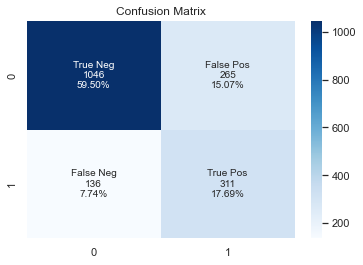

In [56]:
cm =confusion_matrix(y_test,predictions)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()